In [57]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [58]:
def roundness(contour, moments):

    length = cv2.arcLength(contour, True)
    k = (length * length) / (moments['m00'] * 4 * np.pi)

    return k

In [59]:
def get_position_to_draw(text, point, font_face, font_scale, thickness):

    text_size = cv2.getTextSize(text, font_face, font_scale, thickness)[0]
    text_x = point[0] - text_size[0] /2
    text_y = point[1] + text_size[1] /2

    return round(text_x), round(text_y)

In [60]:
def eccentricity_from_ellipse(contour):
    """Calculates the eccentricity fitting an ellipse from a contour"""

    (x, y), (MA, ma), angle = cv2.fitEllipse(contour)

    a = ma / 2
    b = MA / 2

    ecc = np.sqrt(a ** 2 - b ** 2) / a
    return ecc


def eccentricity_from_moments(moments):
    """Calculates the eccentricity from the moments of the contour"""

    a1 = (moments['mu20'] + moments['mu02']) / 2
    a2 = np.sqrt(4 * moments['mu11'] ** 2 + (moments['mu20'] - moments['mu02']) ** 2) / 2
    ecc = np.sqrt(1 - (a1 - a2) / (a1 + a2))
    return ecc

``cv2.ellipse`` 

syntax: ``cv.ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> 	img``

Parameters

- ``img``	Image.
- ``center``	Center of the ellipse.
- ``axes``	Half of the size of the ellipse main axes.
- ``angle``	Ellipse rotation angle in degrees.
- ``startAngle``	Starting angle of the elliptic arc in degrees.
- ``endAngle``	Ending angle of the elliptic arc in degrees.
- ``color``	Ellipse color.
- ``thickness``	Thickness of the ellipse arc outline, if positive. Otherwise, this indicates that a filled ellipse sector is to be drawn.
- lineType	Type of the ellipse boundary. See LineTypes
- shift	Number of fractional bits in the coordinates of the center and values of axe

In [61]:
def build_image_ellipses():

    img = np.zeros((500, 500, 3), dtype="uint8")
    cv2.ellipse(img, (120, 60), (100, 50), 0, 0, 360, (255, 255, 0), -1)
    cv2.ellipse(img, (300, 60), (50, 50), 0, 0, 360, (0, 0, 255), -1)
    cv2.ellipse(img, (425, 200), (50, 150), 0, 0, 360, (255, 0, 0), -1)
    cv2.ellipse(img, (550, 250), (20, 240), 0, 0, 360, (255, 0, 255), -1)
    cv2.ellipse(img, (200, 200), (150, 50), 0, 0, 360, (0, 255, 0), -1)
    cv2.ellipse(img, (250, 400), (200, 50), 0, 0, 360, (0, 255, 255), -1)

    return img


In [62]:
def draw_contour_outline(img, cnts, color, thickness=1):
    """Draws contours outlines of each contour"""

    for cnt in cnts:
        cv2.drawContours(img, [cnt], 0, color, thickness)


def img_plt(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(14, 6))
plt.suptitle("Eccentricity", fontsize=14, fontweight='bold')
plt.rcParams['figure.facecolor'] = 'silver'

<Figure size 1008x432 with 0 Axes>

In [63]:
#Loading the image, and converting it to a GrayScale

image = build_image_ellipses()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [64]:
#thresholding to get a binary image 

ret, thresh = cv2.threshold(gray_image, 20, 255, cv2.THRESH_BINARY)

In [65]:
#getting contours 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [66]:
#getting number of detected Contours
print("Detected Contours: '{}' ".format(len(contours)))

Detected Contours: '5' 


In [67]:
img_number = image.copy()

for contour in contours:

    draw_contour_outline(image, [contour], (255, 255, 255), 5)

    #computing the moment of the contour
    M = cv2.moments(contour)

    #calculating the roundness
    k = roundness(contour, M)
    print("RoundNess: '{}' ".format(k))

    #calculating the Eccentricity 
    em = eccentricity_from_moments(M)
    print("Eccentricity From MOMENTS: '{}' ".format(em))

    ee = eccentricity_from_ellipse(contour)
    print("eccentricity From ELLIPSE: '{}'".format(ee))


    #getting the CENTROID
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    #getting the position to draw
    
    text_to_draw = str(round(em, 3))
    (x, y) = get_position_to_draw(text_to_draw, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, 3)

    #write the name of shape on the center of shapes:
    cv2.putText(img_number, text_to_draw, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3)

RoundNess: '2.0388145846056815' 
Eccentricity From MOMENTS: '0.9681992268256849' 
eccentricity From ELLIPSE: '0.9681827383184594'
RoundNess: '1.663413637804541' 
Eccentricity From MOMENTS: '0.9428693622900868' 
eccentricity From ELLIPSE: '0.9428181069159358'
RoundNess: '1.6632723712535595' 
Eccentricity From MOMENTS: '0.9428679448203382' 
eccentricity From ELLIPSE: '0.9428232587309695'
RoundNess: '1.130063302572555' 
Eccentricity From MOMENTS: '0.0214458532821444' 
eccentricity From ELLIPSE: '0.020761220564721777'
RoundNess: '1.3226466244668729' 
Eccentricity From MOMENTS: '0.8662822204446381' 
eccentricity From ELLIPSE: '0.8662341180221499'


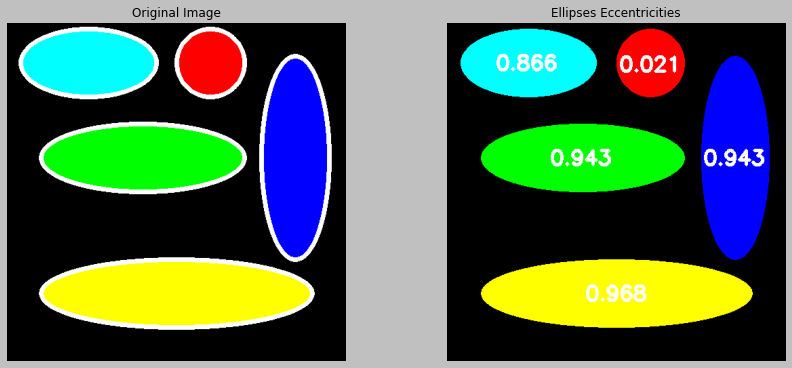

In [68]:
img_plt(image, "Original Image", 1)
img_plt(img_number, "Ellipses Eccentricities", 2)
plt.subplots_adjust(top=3,bottom=1.5, right=2, left=0.2, wspace=0.3, hspace=0.3)

plt.show()